<a href="https://colab.research.google.com/github/MSebastian3/Evaluacion/blob/main/Actividad_5_(Evaluaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categóricas
!pip install funpymodeling

In [2]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl 

In [3]:
#Cargar archivo csv desde equipo
#from google.colab import files
#files.upload()

# ***California_EUA.csv***

## **ETAPA 1**

In [4]:
dfeua = pd.read_csv('California_EUA.csv', encoding = 'unicode_escape')
dfeua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [5]:
#Checar si hay valores nulos por columna
pd.set_option('display.max_rows', None)
valores_nulos=dfeua.isnull().sum().sum()
valores_nulos

48877

### Filtros

In [6]:
#Crear filtro numerico y no numerico
filtroeuanumerico = dfeua.select_dtypes(include=['float64', 'int64'])
#filtroeuanumerico.info()

In [7]:
filtroeua = dfeua.select_dtypes('object')
#filtroeuanonumerico.info()

### Nulos

In [8]:
#sustituir los nulos por el promedio de la columna
data1 = filtroeuanumerico.copy()
filtroeuanumerico = data1.fillna(data1.mean())


#sustituir los nulos por 'sin registro'
filtroeua = filtroeua.fillna('sin registro')


In [9]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=filtroeuanumerico.isnull().sum().sum()
valores_nulos

20808

In [10]:
#Checar si hay valores nulos por columna    NO NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=filtroeua.isnull().sum().sum()
valores_nulos

0

In [11]:
#NUMERICO
#Se eliminaron las columnas 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'
#ya que son numericas pero no tienen ningun registro y no aportan valor al análisis
filtroeuanumerico = filtroeuanumerico.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], axis=1)

#Checar si hay valores nulos por columna
pd.set_option('display.max_rows', None)
valores_nulos=filtroeuanumerico.isnull().sum().sum()
valores_nulos

0

### Outliers **MÉTODO DE IQR (RANGO INTER QUARTILICO)**

In [12]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=filtroeuanumerico

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
#print("Limite superior permitido", Limite_Superior_iqr)
#print("Limite inferior permitido", Limite_Inferior_iqr)

In [13]:
#Encontramos Ouliers
outliers_iqr= filtroeuanumerico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
#outliers_iqr.head()

In [14]:
#Obtenemos datos limpios
data_clean_iqr1= filtroeuanumerico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
#data_clean_iqr1.head()

In [15]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=data_clean_iqr1.isnull().sum().sum()
valores_nulos

17526

In [16]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=filtroeuanumerico.copy()
data5_iqr=data5_iqr.fillna(round(filtroeuanumerico.mean(),1))
#data5_iqr

In [17]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=data5_iqr.isnull().sum().sum()
valores_nulos

0

### Concatenar

In [18]:
concatenadoeua = pd.concat([data5_iqr, filtroeua], axis=1)
concatenadoeua.head()

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,958.0,2.020000e+13,1169,1,1,37.77028,-122.43317,3,1.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5858.0,2.020000e+13,8904,2,2,37.74474,-122.42089,4,2.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,sin registro,f
2,8142.0,2.020000e+13,21994,13,14,37.76555,-122.45213,1,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,sin registro,f
3,8339.0,2.020000e+13,24215,2,6,37.77564,-122.43642,4,2.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,8739.0,2.020000e+13,7149,2,2,37.76030,-122.42197,3,1.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


### Guardar a CSV

In [19]:
#Convertir archivo filtrado a CSV
#concatenadoeua.to_csv("EUA_limpio.csv")

In [20]:
#descargar archivo filtrado en csv
from google.colab import files  
#files.download("EUA_limpio.csv")

## **ETAPA 2**

In [21]:
#filtroa
#se cambiaron los valores "sin registro" por "5%" para poder identificarlos ya que el dataset no tiene registros con ese valor
concatenadoeua["host_acceptance_rate"] = concatenadoeua["host_acceptance_rate"].replace("sin registro", "5%")
#se elimino el "%"
concatenadoeua['host_acceptance_rate'] = pd.to_numeric(concatenadoeua['host_acceptance_rate'].str.replace('%', ''))



In [22]:
#filtroe
#cambiar Half-bath, Shared half-bath, Private half-bath, sin registro
concatenadoeua["bathrooms_text"] = concatenadoeua["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('sin registro', '0')

#se extraen los numeros y se guardan como string en la misma columna
concatenadoeua["bathrooms_text"] = concatenadoeua["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)

#cambiar columna a float
concatenadoeua["bathrooms_text"] = concatenadoeua["bathrooms_text"].astype(float)

In [23]:
#filtrof
#se elimino el "$" y ","
#se cambia la columna "price" a float para poder compararla
concatenadoeua["price"] = concatenadoeua["price"].str.replace(',', '').str.replace('$', '').astype(float)


<ipython-input-23-af53cb0f8d5c>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  concatenadoeua["price"] = concatenadoeua["price"].str.replace(',', '').str.replace('$', '').astype(float)


### **Filtros**

In [24]:
filtroa_eua = concatenadoeua[concatenadoeua["host_acceptance_rate"] > 50]
filtrob_eua = concatenadoeua[concatenadoeua["host_is_superhost"] == "t"]
filtroc_eua = concatenadoeua[concatenadoeua["host_identity_verified"] == "f"]
filtrod_eua = concatenadoeua[concatenadoeua["property_type"].isin(["Private room", "Hotel room"])]
filtroe_eua = concatenadoeua[concatenadoeua["bathrooms_text"] > 1]
filtrof_eua = concatenadoeua.loc[(concatenadoeua['price'] > 10000) & (concatenadoeua['room_type'] == 'Entire home/apt')]
filtrog_eua = concatenadoeua[concatenadoeua["review_scores_cleanliness"] > 4.5]
filtroh_eua = concatenadoeua[concatenadoeua["review_scores_value"] > 4.9]
filtroi_eua = concatenadoeua[concatenadoeua["availability_365"] < 100]
filtroj_eua = concatenadoeua[concatenadoeua["host_response_time"] == "within an hour"]

In [25]:
concatenadoeua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   scrape_id                                     6936 non-null   float64
 2   host_id                                       6936 non-null   int64  
 3   host_listings_count                           6936 non-null   int64  
 4   host_total_listings_count                     6936 non-null   int64  
 5   latitude                                      6936 non-null   float64
 6   longitude                                     6936 non-null   float64
 7   accommodates                                  6936 non-null   int64  
 8   bedrooms                                      6936 non-null   float64
 9   beds                                          6936 non-null   f

### Guardar a CSV

In [26]:
#Convertir archivo filtrado a CSV
#filtroa.to_csv("filtroa_eua.csv")
#filtrob.to_csv("filtrob_eua.csv")
#filtroc.to_csv("filtroc_eua.csv")
#filtrod.to_csv("filtrod_eua.csv")
#filtroe.to_csv("filtroe_eua.csv")
#filtrof.to_csv("filtrof_eua.csv")
#filtrog.to_csv("filtrog_eua.csv")
#filtroh.to_csv("filtroh_eua.csv")
#filtroi.to_csv("filtroi_eua.csv")
#filtroj.to_csv("filtroj_eua.csv")

In [27]:
#descargar archivo filtrado en csv
from google.colab import files  
#files.download("filtroa_eua.csv")
#files.download("filtrob_eua.csv")
#files.download("filtroc_eua.csv")
#files.download("filtrod_eua.csv")
#files.download("filtroe_eua.csv")
#files.download("filtrof_eua.csv")
#files.download("filtrog_eua.csv")
#files.download("filtroh_eua.csv")
#files.download("filtroi_eua.csv")
#files.download("filtroj_eua.csv")

# ***Girona_España.csv***

## **ETAPA 1**

In [28]:
dfeua = pd.read_csv('Girona_España.csv', encoding = 'unicode_escape')
dfeua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [29]:
#Checar si hay valores nulos por columna
pd.set_option('display.max_rows', None)
valores_nulos=dfeua.isnull().sum().sum()
valores_nulos

174630

### Filtros

In [30]:
#Crear filtro numerico y no numerico
filtroeuanumerico = dfeua.select_dtypes(include=['float64', 'int64'])
#filtroeuanumerico.info()

In [31]:
filtroeua = dfeua.select_dtypes('object')
#filtroeuanonumerico.info()

### Nulos

In [32]:
#sustituir los nulos por el promedio de la columna
data1 = filtroeuanumerico.copy()
filtroeuanumerico = data1.fillna(data1.mean())


#sustituir los nulos por 'sin registro'
filtroeua = filtroeua.fillna('sin registro')


In [33]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=filtroeuanumerico.isnull().sum().sum()
valores_nulos

58965

In [34]:
#Checar si hay valores nulos por columna    NO NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=filtroeua.isnull().sum().sum()
valores_nulos

0

In [35]:
#NUMERICO
#Se eliminaron las columnas 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'
#ya que son numericas pero no tienen ningun registro y no aportan valor al análisis
filtroeuanumerico = filtroeuanumerico.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], axis=1)

#Checar si hay valores nulos por columna
pd.set_option('display.max_rows', None)
valores_nulos=filtroeuanumerico.isnull().sum().sum()
valores_nulos

0

### Outliers **MÉTODO DE IQR (RANGO INTER QUARTILICO)**

In [36]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=filtroeuanumerico

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
#print("Limite superior permitido", Limite_Superior_iqr)
#print("Limite inferior permitido", Limite_Inferior_iqr)

In [37]:
#Encontramos Ouliers
outliers_iqr= filtroeuanumerico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
#outliers_iqr.head()

In [38]:
#Obtenemos datos limpios
data_clean_iqr1= filtroeuanumerico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
#data_clean_iqr1.head()

In [39]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=data_clean_iqr1.isnull().sum().sum()
valores_nulos

37109

In [40]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=filtroeuanumerico.copy()
data5_iqr=data5_iqr.fillna(round(filtroeuanumerico.mean(),1))
#data5_iqr

In [41]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=data5_iqr.isnull().sum().sum()
valores_nulos

0

### Concatenar

In [42]:
concatenadoesp = pd.concat([data5_iqr, filtroeua], axis=1)
concatenadoesp.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,14551.0,2.023030e+13,57237,1.0,5.0,41.99650,2.83646,2,1.0,1.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",$42.00,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,1205757.0,2.023030e+13,6586355,1.0,1.0,41.79304,2.77412,2,1.0,1.0,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",$47.00,t,31/03/2023,01/08/2013,26/06/2022,sin registro,f
2,1212820.0,2.023030e+13,6620645,2.0,3.0,42.11284,3.16670,4,1.0,2.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",$74.00,t,01/04/2023,10/06/2013,30/12/2022,sin registro,f
3,751638.0,2.023030e+13,3680160,6.0,6.0,42.36958,2.98030,2,1.0,2.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",$45.00,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,41342.0,2.023030e+13,180072,2.0,3.0,42.34655,3.20463,4,1.0,1.0,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",$120.00,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f


### Guardar a CSV

In [43]:
#Convertir archivo filtrado a CSV
#concatenadoeua.to_csv("ESP_limpio.csv")

In [44]:
#descargar archivo filtrado en csv
from google.colab import files  
#files.download("ESP_limpio.csv")

## **ETAPA 2**

In [45]:
#filtroa
#se cambiaron los valores "sin registro" por "5%" para poder identificarlos ya que el dataset no tiene registros con ese valor
concatenadoesp["host_acceptance_rate"] = concatenadoesp["host_acceptance_rate"].replace("sin registro", "5%")
#se elimino el "%"
concatenadoesp['host_acceptance_rate'] = pd.to_numeric(concatenadoesp['host_acceptance_rate'].str.replace('%', ''))



In [46]:
#filtroe
#cambiar Half-bath, Shared half-bath, Private half-bath, sin registro
concatenadoesp["bathrooms_text"] = concatenadoesp["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('sin registro', '0')

#se extraen los numeros y se guardan como string en la misma columna
concatenadoesp["bathrooms_text"] = concatenadoesp["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)

#cambiar columna a float
concatenadoesp["bathrooms_text"] = concatenadoesp["bathrooms_text"].astype(float)

In [47]:
#filtrof
#se elimino el "$" y ","
#se cambia la columna "price" a float para poder compararla
concatenadoesp["price"] = concatenadoesp["price"].str.replace(',', '').str.replace('$', '').astype(float)


<ipython-input-47-107e83d7837f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  concatenadoesp["price"] = concatenadoesp["price"].str.replace(',', '').str.replace('$', '').astype(float)


In [48]:
filtroa_esp = concatenadoesp[concatenadoesp["host_acceptance_rate"] > 50]
filtrob_esp = concatenadoesp[concatenadoesp["host_is_superhost"] == "t"]
filtroc_esp = concatenadoesp[concatenadoesp["host_identity_verified"] == "f"]
filtrod_esp = concatenadoesp[concatenadoesp["property_type"].isin(["Private room", "Hotel room"])]
filtroe_esp = concatenadoesp[concatenadoesp["bathrooms_text"] > 1]
filtrof_esp = concatenadoesp.loc[(concatenadoesp['price'] > 10000) & (concatenadoesp['room_type'] == 'Entire home/apt')]
filtrog_esp = concatenadoesp[concatenadoesp["review_scores_cleanliness"] > 4.5]
filtroh_esp = concatenadoesp[concatenadoesp["review_scores_value"] > 4.9]
filtroi_esp = concatenadoesp[concatenadoesp["availability_365"] < 100]
filtroj_esp = concatenadoesp[concatenadoesp["host_response_time"] == "within an hour"]

### Guardar a CSV

In [49]:
#Convertir archivo filtrado a CSV
#filtroa.to_csv("filtroa_esp.csv")
#filtrob.to_csv("filtrob_esp.csv")
#filtroc.to_csv("filtroc_esp.csv")
#filtrod.to_csv("filtrod_esp.csv")
#filtroe.to_csv("filtroe_esp.csv")
#filtrof.to_csv("filtrof_esp.csv")
#filtrog.to_csv("filtrog_esp.csv")
#filtroh.to_csv("filtroh_esp.csv")
#filtroi.to_csv("filtroi_esp.csv")
#filtroj.to_csv("filtroj_esp.csv")

In [50]:
#descargar archivo filtrado en csv
from google.colab import files  
#files.download("filtroa_esp.csv")
#files.download("filtrob_esp.csv")
#files.download("filtroc_esp.csv")
#files.download("filtrod_esp.csv")
#files.download("filtroe_esp.csv")
#files.download("filtrof_esp.csv")
#files.download("filtrog_esp.csv")
#files.download("filtroh_esp.csv")
#files.download("filtroi_esp.csv")
#files.download("filtroj_esp.csv")

# ***DF_Mexico.csv***

## **ETAPA 1**

In [51]:
dfeua = pd.read_csv('DF_Mexico.csv')#, encoding = 'unicode_escape')
dfeua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [52]:
#Checar si hay valores nulos por columna
pd.set_option('display.max_rows', None)
valores_nulos=dfeua.isnull().sum().sum()
valores_nulos

189609

### Filtros

In [53]:
#Crear filtro numerico y no numerico
filtroeuanumerico = dfeua.select_dtypes(include=['float64', 'int64'])
#filtroeuanumerico.info()

In [54]:
filtroeua = dfeua.select_dtypes('object')
#filtroeuanonumerico.info()

### Nulos

In [55]:
#sustituir los nulos por el promedio de la columna
data1 = filtroeuanumerico.copy()
filtroeuanumerico = data1.fillna(data1.mean())


#sustituir los nulos por 'sin registro'
filtroeua = filtroeua.fillna('sin registro')


In [56]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=filtroeuanumerico.isnull().sum().sum()
valores_nulos

96896

In [57]:
#Checar si hay valores nulos por columna    NO NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=filtroeua.isnull().sum().sum()
valores_nulos

0

In [58]:
#NUMERICO
#Se eliminaron las columnas 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license'
#ya que son numericas pero no tienen ningun registro y no aportan valor al análisis
filtroeuanumerico = filtroeuanumerico.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated','license'], axis=1)

#Checar si hay valores nulos por columna
pd.set_option('display.max_rows', None)
valores_nulos=filtroeuanumerico.isnull().sum().sum()
valores_nulos

0

### Outliers **MÉTODO DE IQR (RANGO INTER QUARTILICO)**

In [59]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=filtroeuanumerico

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
#print("Limite superior permitido", Limite_Superior_iqr)
#print("Limite inferior permitido", Limite_Inferior_iqr)

In [60]:
#Encontramos Ouliers
outliers_iqr= filtroeuanumerico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
#outliers_iqr.head()

In [61]:
#Obtenemos datos limpios
data_clean_iqr1= filtroeuanumerico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
#data_clean_iqr1.head()

In [62]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=data_clean_iqr1.isnull().sum().sum()
valores_nulos

54132

In [63]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=filtroeuanumerico.copy()
data5_iqr=data5_iqr.fillna(round(filtroeuanumerico.mean(),1))
#data5_iqr

In [64]:
#Checar si hay valores nulos por columna    NUMERICO
pd.set_option('display.max_rows', None)
valores_nulos=data5_iqr.isnull().sum().sum()
valores_nulos

0

### Concatenar

In [65]:
concatenadomex = pd.concat([data5_iqr, filtroeua], axis=1)
concatenadomex.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2056638,20230329041210,10531228,3,7,19.35353,-99.16299,3,1.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,f
1,2072354,20230329041210,16840050,3,3,19.35358,-99.16948,2,1.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,f
2,696037,20230329041210,3531879,4,4,19.44180,-99.18402,6,3.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
3,35797,20230329041210,153786,1,1,19.38283,-99.27178,2,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,sin registro,sin registro,f
4,44616,20230329041210,196253,16,16,19.41162,-99.17794,14,5.0,8.0,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f


### Guardar a CSV

In [66]:
#Convertir archivo filtrado a CSV
#concatenadoeua.to_csv("MEX_limpio.csv")

In [67]:
#descargar archivo filtrado en csv
from google.colab import files  
#files.download("MEX_limpio.csv")

## **ETAPA 2**

In [68]:
#filtroa
#se cambiaron los valores "sin registro" por "5%" para poder identificarlos ya que el dataset no tiene registros con ese valor
concatenadomex["host_acceptance_rate"] = concatenadomex["host_acceptance_rate"].replace("sin registro", "5%")
#se elimino el "%"
concatenadomex['host_acceptance_rate'] = pd.to_numeric(concatenadomex['host_acceptance_rate'].str.replace('%', ''))



In [69]:
#filtroe
#cambiar Half-bath, Shared half-bath, Private half-bath, sin registro
concatenadomex["bathrooms_text"] = concatenadomex["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('sin registro', '0')

#se extraen los numeros y se guardan como string en la misma columna
concatenadomex["bathrooms_text"] = concatenadomex["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)

#cambiar columna a float
concatenadomex["bathrooms_text"] = concatenadomex["bathrooms_text"].astype(float)

In [70]:
#filtrof
#se elimino el "$" y ","
#se cambia la columna "price" a float para poder compararla
concatenadomex["price"] = concatenadomex["price"].str.replace(',', '').str.replace('$', '').astype(float)


<ipython-input-70-974be77fc972>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  concatenadomex["price"] = concatenadomex["price"].str.replace(',', '').str.replace('$', '').astype(float)


In [71]:
filtroa_mex = concatenadomex[concatenadomex["host_acceptance_rate"] > 50]
filtrob_mex = concatenadomex[concatenadomex["host_is_superhost"] == "t"]
filtroc_mex = concatenadomex[concatenadomex["host_identity_verified"] == "f"]
filtrod_mex = concatenadomex[concatenadomex["property_type"].isin(["Private room", "Hotel room"])]
filtroe_mex = concatenadomex[concatenadomex["bathrooms_text"] > 1]
filtrof_mex = concatenadomex.loc[(concatenadomex['price'] > 10000) & (concatenadomex['room_type'] == 'Entire home/apt')]
filtrog_mex = concatenadomex[concatenadomex["review_scores_cleanliness"] > 4.5]
filtroh_mex = concatenadomex[concatenadomex["review_scores_value"] > 4.9]
filtroi_mex = concatenadomex[concatenadomex["availability_365"] < 100]
filtroj_mex = concatenadomex[concatenadomex["host_response_time"] == "within an hour"]

### Guardar a CSV

In [72]:
#Convertir archivo filtrado a CSV
#filtroa.to_csv("filtroa_mex.csv")
#filtrob.to_csv("filtrob_mex.csv")
#filtroc.to_csv("filtroc_mex.csv")
#filtrod.to_csv("filtrod_mex.csv")
#filtroe.to_csv("filtroe_mex.csv")
#filtrof.to_csv("filtrof_mex.csv")
#filtrog.to_csv("filtrog_mex.csv")
#filtroh.to_csv("filtroh_mex.csv")
#filtroi.to_csv("filtroi_mex.csv")
#filtroj.to_csv("filtroj_mex.csv")

In [73]:
#descargar archivo filtrado en csv
from google.colab import files  
#files.download("filtroa_mex.csv")
#files.download("filtrob_mex.csv")
#files.download("filtroc_mex.csv")
#files.download("filtrod_mex.csv")
#files.download("filtroe_mex.csv")
#files.download("filtrof_mex.csv")
#files.download("filtrog_mex.csv")
#files.download("filtroh_mex.csv")
#files.download("filtroi_mex.csv")
#files.download("filtroj_mex.csv")

# ***Insights filtros***

In [74]:
#print(filtroj_eua.info(),filtroj_esp.info(),filtroj_mex.info())

Conclusión filtros

Para el filtro a primero que nada debieron cambiarse los valores en registro por un valor numérico, en este caso se cambiaron por el 5% ya que este valor no está en los registros por lo que de esta manera pueden ser identificados y posteriormente se eliminó el porcentaje presente en los registros. Después de eso se utilizó la función para filtrar las instancias cuyo valor es mayor a 50. En el data set de EUA sostuvieron 5679 instancias, en el de España 17,285 millones de Mexico 20,840. La diferencia de drástica de cantidades se deben parte del tamaño de las bases de datos, México siendo la más grande seguida por España y Estados Unidos.

El filtro b obtiene las instancias cuyo valor es correcto en la columna host_is_superhost en EUA se obtuvieron 2869 registros, en España 3056 registros y en México 8793 registros. 

El filtro c obtiene los valores falsos para la columna host_identity_verified, archivo de Estados Unidos 830 registros, en el de España 2261 registros y en el de Mexico 1923 registros.

El filtro d como a las instancias con valor de cuarto privado y de Cuarto de Hotel en la columna property_type. Es la tasa de Estados Unidos obtuvo cuatro registros, el de España siete y el de Mexico 43. 

Para el filtro e primero se tuvieron que cambiar los valores en texto a un número ya que estos no contenían ningún número por ejemplo medio baño. Después de televisión código para extraer los números de la columna y por último se cambió la columna a float. Esto para poder utilizar la función de filtrado para valores que son mayores a uno. En Estados Unidos sostuvieron 1844 registros, en España 9130 y en México 8904.

Para el filtro F  se eliminaron los signos de pesos y las comas de la columna y después se cambió a tipo float para después filtrar a valores mayores de 10,000 y que el tipo de cuarto sea igual a la casa completa. En Estados Unidos obtuvieron dos registros, en España 10 y en México 173.

El filtro G toma los valores mío es 4.5 en la columna review_scores_cleanliness en Estados Unidos sostuvieron 6127 registros, en España 14,690 y en México 21,445.

El filtro H similarmente al anterior, toma los valores mayores a 4.9 pero para la columna review_scores_value. En Estados Unidos obtuvieron 1376 registros, en España 2596 y en México 6484.

El filtro I toma los valores menores a 100 en la columna availability_365. En Estados Unidos se obtuvieron 2680 registros, en España 4981 y en México 5130.

El filtro J toma los valores de la columna host_response_time qué son iguales a menos de una hora. En Estados Unidos obtuvieron 4221 registros, en España 12,261 y por último en México 16,997.

Cabe mencionar que la discrepancia entre los tres archivos se puede ver en parte a la cantidad de registros en cada uno, será interesante comparar dichos datos con un porcentaje del total de los registros para cada una de las bases de datos en la siguiente etapa del entregable.

# **ETAPA 3**

## a)

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(concatenadoeua)
freq_tbl(concatenadoesp)
freq_tbl(concatenadomex)

In [129]:
#Obtengo un análisis univariado de una variable categórica en específico
table_eua= freq_tbl(concatenadoeua['host_response_time'])
table_esp= freq_tbl(concatenadoesp['host_response_time'])
table_mex= freq_tbl(concatenadomex['host_response_time'])

In [130]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table_eua.copy()
Filtro2= table_esp.copy()
Filtro3= table_mex.copy()
Filtro1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,4221,0.608564,0.608564
1,within a few hours,1111,0.160179,0.768743
2,sin registro,1019,0.146915,0.915657
3,within a day,452,0.065167,0.980825
4,a few days or more,133,0.019175,1.000000


In [131]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro1.set_index('host_response_time')
Filtro_index2= Filtro2.set_index('host_response_time')
Filtro_index3= Filtro3.set_index('host_response_time')

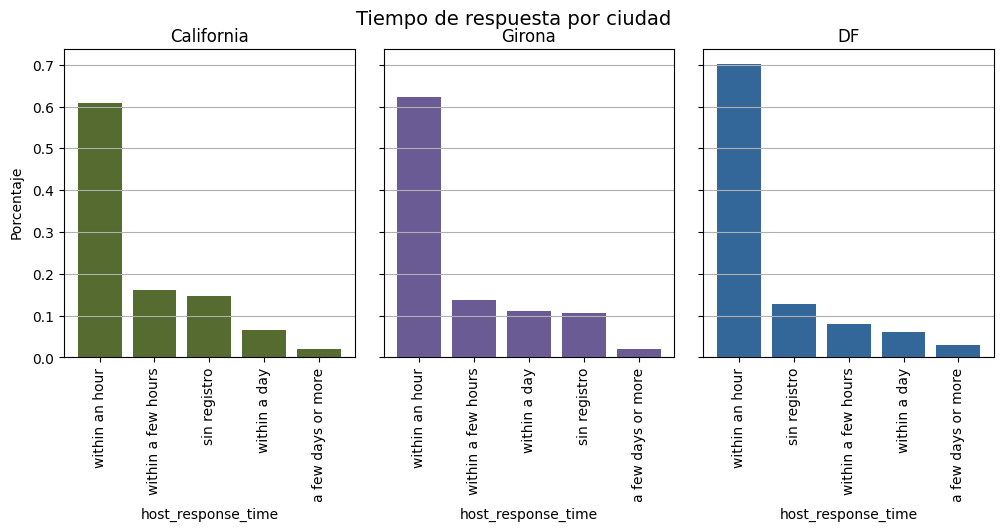

In [132]:
#Realizamos grafico de barras del dataframe filtrado
#Gráfico de barras
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

Filtro_index1["percentage"].plot(kind='bar', ax=axs[0], color= '#556B2F', width=0.8)
Filtro_index2["percentage"].plot(kind='bar', ax=axs[1], color= '#6B5B95', width=0.8)
Filtro_index3["percentage"].plot(kind='bar', ax=axs[2], color= '#336699', width=0.8)
axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('DF')

# Agregamos lineas guía en cada grafico
for ax in axs:
    ax.grid(axis='y')
    
# Agregamos títulos de los ejes
fig.text(0.08, 0.5, 'Porcentaje', va= 'center', rotation='vertical')
fig.suptitle('Tiempo de respuesta por ciudad', fontsize=14)
plt.show()



La gráfica mostrada anteriormente muestra el tiempo de respuesta dividido por ciudades. Se puede observar que DF tiene el porcentaje de respuesta más rápido (menor a una hora) con poco más de 70% de los anfitriones obteniendo dicha calificación. Seguido por Girona con aproximadamente 63% por último California con aproximadamente 61% de los registros. En general esto muestra qué alarma de las tres ciudades tienen un tiempo de respuesta muy bueno ya que las siguientes categorías en las tres ciudades son menores al 20%. 


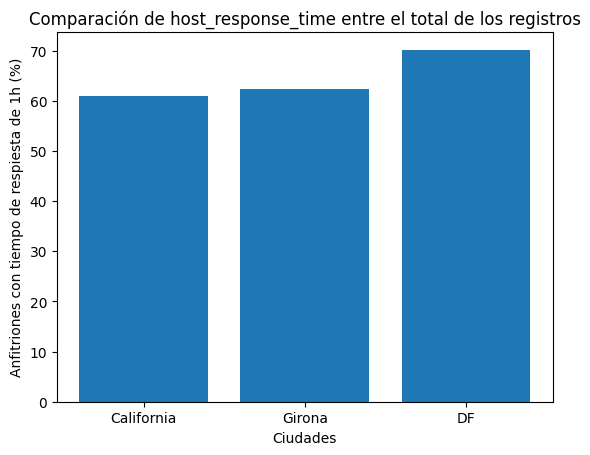

In [133]:
#a)
# Obtener la media de las tasas de aceptación en cada dataframe
eua_mean = ((filtroj_eua['host_response_time'].count())/concatenadoeua['host_response_time'].count())*100
esp_mean = ((filtroj_esp['host_response_time'].count())/concatenadoesp['host_response_time'].count())*100
mex_mean = ((filtroj_mex['host_response_time'].count())/concatenadomex['host_response_time'].count())*100

# Crear una lista con los valores medios
means = [eua_mean, esp_mean, mex_mean]

# Crear una lista con los nombres de los dataframes
names = ['California', 'Girona', 'DF']

# Crear la gráfica de barras
plt.bar(names, means)

# Añadir título y etiquetas a los ejes
plt.title('Comparación de host_response_time entre el total de los registros')
plt.xlabel('Ciudades')
plt.ylabel('Anfitriones con tiempo de respiesta de 1h (%)')

# Mostrar la gráfica
plt.show()

## b) 

In [81]:
#convertir columna numerica a object
concatenadoeua['host_acceptance_rate'] = concatenadoeua['host_acceptance_rate'].astype(str)
concatenadoesp['host_acceptance_rate'] = concatenadoesp['host_acceptance_rate'].astype(str)
concatenadomex['host_acceptance_rate'] = concatenadomex['host_acceptance_rate'].astype(str)

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(concatenadoeua)
freq_tbl(concatenadoesp)
freq_tbl(concatenadomex)

In [83]:
#Obtengo un análisis univariado de una variable categórica en específico
table_eua= freq_tbl(concatenadoeua['host_acceptance_rate'])
table_esp= freq_tbl(concatenadoesp['host_acceptance_rate'])
table_mex= freq_tbl(concatenadomex['host_acceptance_rate'])

In [84]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table_eua[table_eua['percentage']>0.05]
Filtro2= table_esp[table_esp['percentage']>0.05]
Filtro3= table_mex[table_mex['percentage']>0.05]

In [85]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro1.set_index('host_acceptance_rate')
Filtro_index2= Filtro2.set_index('host_acceptance_rate')
Filtro_index3= Filtro3.set_index('host_acceptance_rate')

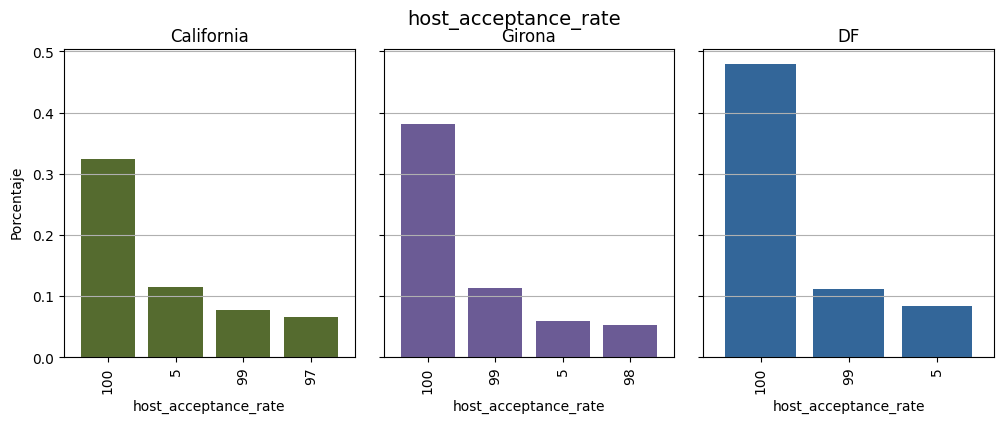

In [86]:
#Realizamos grafico de barras del dataframe filtrado
#Gráfico de barras
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

Filtro_index1["percentage"].plot(kind='bar', ax=axs[0], color= '#556B2F', width=0.8)
Filtro_index2["percentage"].plot(kind='bar', ax=axs[1], color= '#6B5B95', width=0.8)
Filtro_index3["percentage"].plot(kind='bar', ax=axs[2], color= '#336699', width=0.8)
axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('DF')

# Agregamos lineas guía en cada grafico
for ax in axs:
    ax.grid(axis='y')
    
# Agregamos títulos de los ejes
fig.text(0.08, 0.5, 'Porcentaje', va= 'center', rotation='vertical')
fig.suptitle('host_acceptance_rate', fontsize=14)
plt.show()

El puntaje de aceptación de los anfitriones es muy positivo ya que en las tres ciudades la categoría más alta es de 100. En DF está tienes el 47% de los registros, seguirá por Girona con el 38% y California con el 33%. 

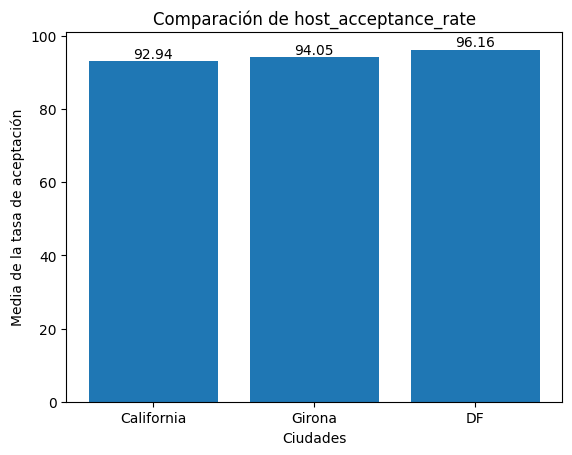

In [87]:
#b)
# Obtener la media de las tasas de aceptación en cada dataframe
eua_mean = filtroa_eua['host_acceptance_rate'].mean()
esp_mean = filtroa_esp['host_acceptance_rate'].mean()
mex_mean = filtroa_mex['host_acceptance_rate'].mean()

# Crear una lista con los valores medios
means = [eua_mean, esp_mean, mex_mean]

# Crear una lista con los nombres de los dataframes
names = ['California', 'Girona', 'DF']

# Crear la gráfica de barras
plt.bar(names, means)

# Añadir título y etiquetas a los ejes
plt.title('Comparación de host_acceptance_rate')
plt.xlabel('Ciudades')
plt.ylabel('Media de la tasa de aceptación')

# Agregar etiquetas de valores a las barras
for i, v in enumerate(means):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Mostrar la gráfica
plt.show()

## c)

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(concatenadoeua)
freq_tbl(concatenadoesp)
freq_tbl(concatenadomex)

In [135]:
#Obtengo un análisis univariado de una variable categórica en específico
table_eua= freq_tbl(concatenadoeua['host_identity_verified'])
table_esp= freq_tbl(concatenadoesp['host_identity_verified'])
table_mex= freq_tbl(concatenadomex['host_identity_verified'])

In [136]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table_eua[table_eua['percentage']>0.05]
Filtro2= table_esp[table_esp['percentage']>0.05]
Filtro3= table_mex[table_mex['percentage']>0.05]

In [137]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro1.set_index('host_identity_verified')
Filtro_index2= Filtro2.set_index('host_identity_verified')
Filtro_index3= Filtro3.set_index('host_identity_verified')

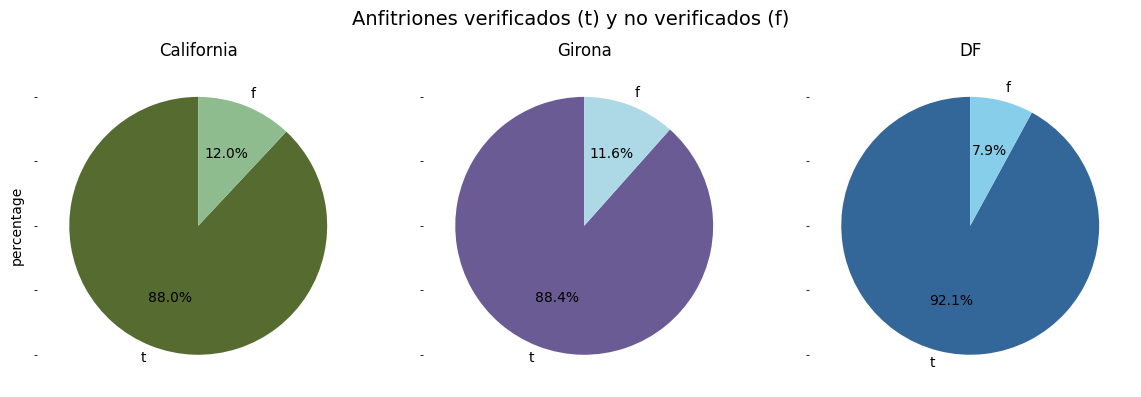

In [138]:
# create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

# create pie chart for each city
Filtro_index1["percentage"].plot(kind='pie', ax=axs[0], colors= ['#556B2F', '#8FBC8F'], autopct='%1.1f%%', startangle=90)
Filtro_index2["percentage"].plot(kind='pie', ax=axs[1], colors= ['#6B5B95', '#ADD8E6'], autopct='%1.1f%%', startangle=90)
Filtro_index3["percentage"].plot(kind='pie', ax=axs[2], colors= ['#336699', '#87CEEB'], autopct='%1.1f%%', startangle=90)

# set title for each subplot
axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('DF')

# add title and adjust layout
fig.suptitle('Anfitriones verificados (t) y no verificados (f)', fontsize=14)
plt.tight_layout()

# show the plot
plt.show()


Las gráficas de Pie muestran el porcentaje de verificados y no verificados en las tres ciudades, se puede observar una tendencia a que la gran mayoría de los anfitriones están verificados, el porcentaje más alto siendo el 92% en la ciudad de DF seguida por Girona con el 88.4% y California con el 88%, resultados muy similares. Similarmente los no verificados tienen el orden contrario, ya que la categoría sin registro cuenta con muy pocas instancias. 

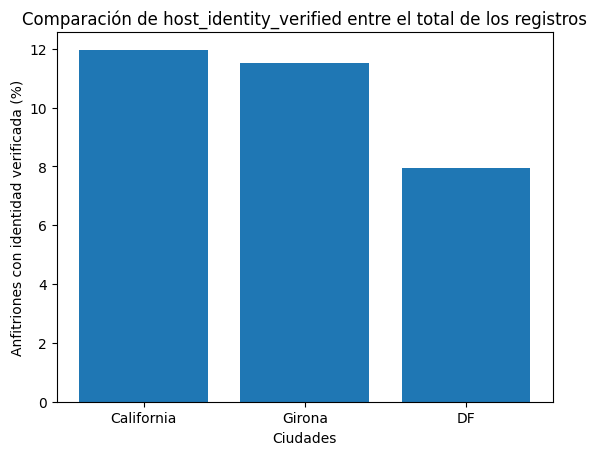

In [139]:
#c)
# Obtener la media de las tasas de aceptación en cada dataframe
eua_mean = ((filtroc_eua['host_identity_verified'].count())/concatenadoeua['host_identity_verified'].count())*100
esp_mean = ((filtroc_esp['host_identity_verified'].count())/concatenadoesp['host_identity_verified'].count())*100
mex_mean = ((filtroc_mex['host_identity_verified'].count())/concatenadomex['host_identity_verified'].count())*100

# Crear una lista con los valores medios
means = [eua_mean, esp_mean, mex_mean]

# Crear una lista con los nombres de los dataframes
names = ['California', 'Girona', 'DF']

# Crear la gráfica de barras
plt.bar(names, means)

# Añadir título y etiquetas a los ejes
plt.title('Comparación de host_identity_verified entre el total de los registros')
plt.xlabel('Ciudades')
plt.ylabel('Anfitriones con identidad verificada (%)')

# Mostrar la gráfica
plt.show()

## d) 

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(concatenadoeua)
freq_tbl(concatenadoesp)
freq_tbl(concatenadomex)

In [116]:
#Obtengo un análisis univariado de una variable categórica en específico
table_eua= freq_tbl(concatenadoeua['property_type'])
table_esp= freq_tbl(concatenadoesp['property_type'])
table_mex= freq_tbl(concatenadomex['property_type'])

In [117]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table_eua[table_eua['percentage']>0.1]
Filtro2= table_esp[table_esp['percentage']>0.1]
Filtro3= table_mex[table_mex['percentage']>0.1]

In [118]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro1.set_index('property_type')
Filtro_index2= Filtro2.set_index('property_type')
Filtro_index3= Filtro3.set_index('property_type')

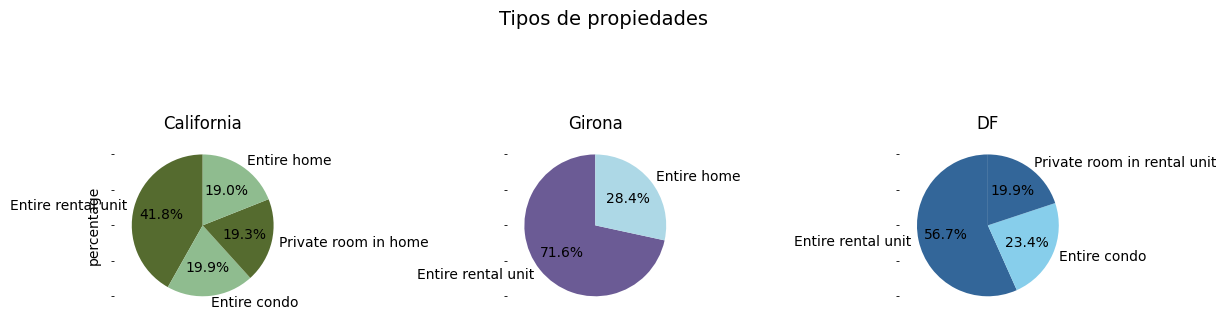

In [119]:
# create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

# create pie chart for each city
Filtro_index1["percentage"].plot(kind='pie', ax=axs[0], colors= ['#556B2F', '#8FBC8F'], autopct='%1.1f%%', startangle=90)
Filtro_index2["percentage"].plot(kind='pie', ax=axs[1], colors= ['#6B5B95', '#ADD8E6'], autopct='%1.1f%%', startangle=90)
Filtro_index3["percentage"].plot(kind='pie', ax=axs[2], colors= ['#336699', '#87CEEB'], autopct='%1.1f%%', startangle=90)

# set title for each subplot
axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('DF')

# add title and adjust layout
fig.suptitle('Tipos de propiedades', fontsize=14)
plt.tight_layout()

# show the plot
plt.show()


En DF la categoría más grande es entire rental unit con el 56.7% de los registros. Similarmente está representa el 71.6% en Girona y el 41.8% en California. Mostrando que es la más popular en las tres ciudades. 

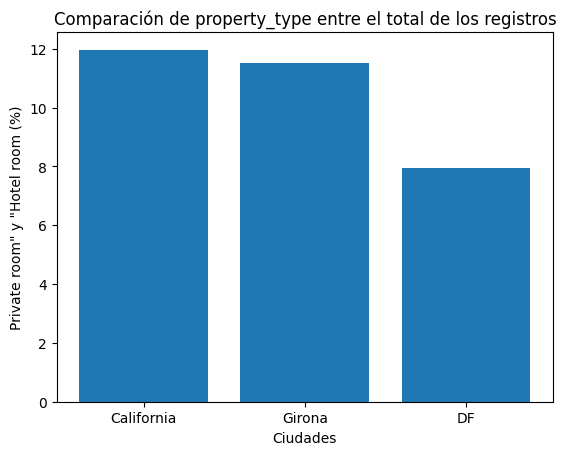

In [121]:
#d)
# Obtener la media de las tasas de aceptación en cada dataframe
eua_mean = ((filtroc_eua['property_type'].count())/concatenadoeua['property_type'].count())*100
esp_mean = ((filtroc_esp['property_type'].count())/concatenadoesp['property_type'].count())*100
mex_mean = ((filtroc_mex['property_type'].count())/concatenadomex['property_type'].count())*100

# Crear una lista con los valores medios
means = [eua_mean, esp_mean, mex_mean]

# Crear una lista con los nombres de los dataframes
names = ['California', 'Girona', 'DF']

# Crear la gráfica de barras
plt.bar(names, means)

# Añadir título y etiquetas a los ejes
plt.title('Comparación de property_type entre el total de los registros')
plt.xlabel('Ciudades')
plt.ylabel('Private room" y "Hotel room (%)')

# Mostrar la gráfica
plt.show()

## f) 

In [100]:
#convertir columna numerica a object
concatenadoeua['availability_365'] = concatenadoeua['availability_365'].astype(str)
concatenadoesp['availability_365'] = concatenadoesp['availability_365'].astype(str)
concatenadomex['availability_365'] = concatenadomex['availability_365'].astype(str)

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(concatenadoeua)
freq_tbl(concatenadoesp)
freq_tbl(concatenadomex)

In [102]:
#Obtengo un análisis univariado de una variable categórica en específico
table_eua= freq_tbl(concatenadoeua['availability_365'])
table_esp= freq_tbl(concatenadoesp['availability_365'])
table_mex= freq_tbl(concatenadomex['availability_365'])

In [103]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table_eua[table_eua['percentage']>0.03]
Filtro2= table_esp[table_esp['percentage']>0.03]
Filtro3= table_mex[table_mex['percentage']>0.03]

#Filtro1 = table_eua[table_eua['availability_365'].isin(['365', '364', '0'])]
#Filtro2 = table_esp[table_esp['availability_365'].isin(['365', '364', '0'])]
#Filtro3 = table_mex[table_mex['availability_365'].isin(['365', '364', '0'])]

In [104]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro1.set_index('availability_365')
Filtro_index2= Filtro2.set_index('availability_365')
Filtro_index3= Filtro3.set_index('availability_365')

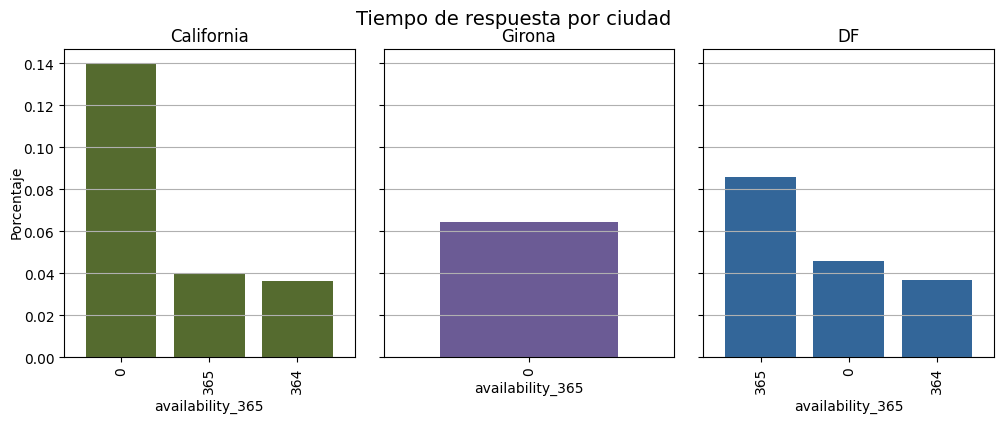

In [105]:
#Realizamos grafico de barras del dataframe filtrado
#Gráfico de barras
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

Filtro_index1["percentage"].plot(kind='bar', ax=axs[0], color= '#556B2F', width=0.8)
Filtro_index2["percentage"].plot(kind='bar', ax=axs[1], color= '#6B5B95', width=0.8)
Filtro_index3["percentage"].plot(kind='bar', ax=axs[2], color= '#336699', width=0.8)
axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('DF')

# Agregamos lineas guía en cada grafico
for ax in axs:
    ax.grid(axis='y')
    
# Agregamos títulos de los ejes
fig.text(0.08, 0.5, 'Porcentaje', va= 'center', rotation='vertical')
fig.suptitle('Tiempo de respuesta por ciudad', fontsize=14)
plt.show()

De las tres ciudades se muestran las categorías que representan más del 3% de los registros. Se puede observar que DF tiene los mejores resultados ya que respuesta los 365 días del año representa el 8% mientras que 364 días casi el 4%. En California son el 4% y 3% respectivamente. En Girona ninguna de esas categorías representan más del 3% de los registros. 

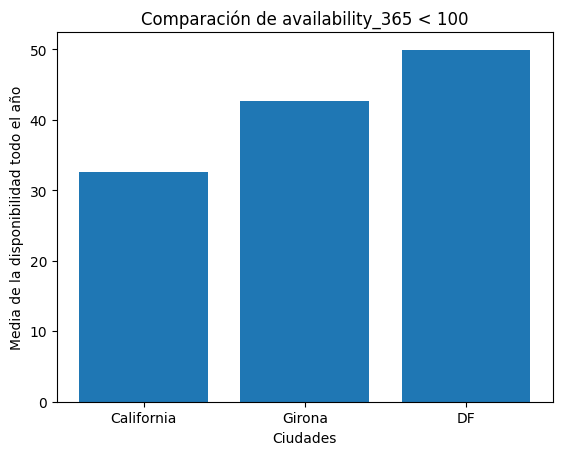

In [106]:
#f)
# Obtener la media de las tasas de aceptación en cada dataframe
eua_mean = filtroi_eua['availability_365'].mean()
esp_mean = filtroi_esp['availability_365'].mean()
mex_mean = filtroi_mex['availability_365'].mean()

# Crear una lista con los valores medios
means = [eua_mean, esp_mean, mex_mean]

# Crear una lista con los nombres de los dataframes
names = ['California', 'Girona', 'DF']

# Crear la gráfica de barras
plt.bar(names, means)

# Añadir título y etiquetas a los ejes
plt.title('Comparación de availability_365 < 100')
plt.xlabel('Ciudades')
plt.ylabel('Media de la disponibilidad todo el año')

# Mostrar la gráfica
plt.show()

## g)

In [107]:
#convertir columna numerica a object
concatenadoeua['review_scores_cleanliness'] = concatenadoeua['review_scores_cleanliness'].astype(str)
concatenadoesp['review_scores_cleanliness'] = concatenadoesp['review_scores_cleanliness'].astype(str)
concatenadomex['review_scores_cleanliness'] = concatenadomex['review_scores_cleanliness'].astype(str)

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(concatenadoeua)
freq_tbl(concatenadoesp)
freq_tbl(concatenadomex)

In [109]:
#Obtengo un análisis univariado de una variable categórica en específico
table_eua= freq_tbl(concatenadoeua['review_scores_cleanliness'])
table_esp= freq_tbl(concatenadoesp['review_scores_cleanliness'])
table_mex= freq_tbl(concatenadomex['review_scores_cleanliness'])

In [110]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table_eua[table_eua['percentage']>0.05]
Filtro2= table_esp[table_esp['percentage']>0.05]
Filtro3= table_mex[table_mex['percentage']>0.05]

In [111]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro1.set_index('review_scores_cleanliness')
Filtro_index2= Filtro2.set_index('review_scores_cleanliness')
Filtro_index3= Filtro3.set_index('review_scores_cleanliness')

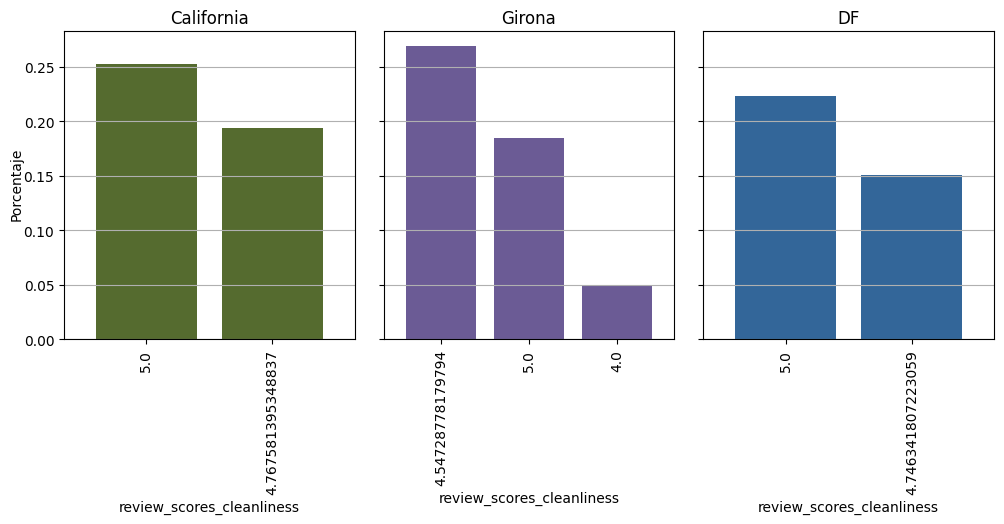

In [112]:
#Realizamos grafico de barras del dataframe filtrado
#Gráfico de barras
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

Filtro_index1["percentage"].plot(kind='bar', ax=axs[0], color= '#556B2F', width=0.8)
Filtro_index2["percentage"].plot(kind='bar', ax=axs[1], color= '#6B5B95', width=0.8)
Filtro_index3["percentage"].plot(kind='bar', ax=axs[2], color= '#336699', width=0.8)
axs[0].set_title('California')
axs[1].set_title('Girona')
axs[2].set_title('DF')

# Agregamos lineas guía en cada grafico
for ax in axs:
    ax.grid(axis='y')
    
# Agregamos títulos de los ejes
fig.text(0.08, 0.5, 'Porcentaje', va= 'center', rotation='vertical')
#fig.suptitle('review_scores_cleanliness', fontsize=14)
plt.show()

Las gráficas muestran los puntajes más altos en cada país en cuanto a puntaje de limpieza. Se puede observar que California es la ciudad que tiene el puntaje de cinco estrellas más alto con más el 25%, seguida por México con el 22.5% y Girona con el 18%.  tanto en California como en D.F. la calificación de cinco es la más alta, en Girona la más alta es de 4.5 con el 28% de las respuestas.

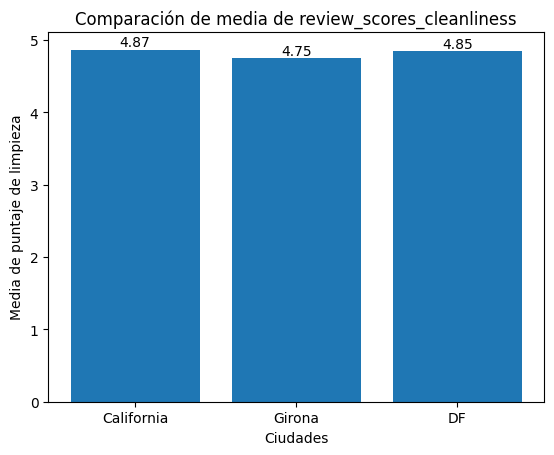

In [113]:
#g)
# Obtener la media de las tasas de aceptación en cada dataframe
eua_mean = filtrog_eua['review_scores_cleanliness'].mean()
esp_mean = filtrog_esp['review_scores_cleanliness'].mean()
mex_mean = filtrog_mex['review_scores_cleanliness'].mean()

# Crear una lista con los valores medios
means = [eua_mean, esp_mean, mex_mean]

# Crear una lista con los nombres de los dataframes
names = ['California', 'Girona', 'DF']

# Crear la gráfica de barras
plt.bar(names, means)

# Añadir título y etiquetas a los ejes
plt.title('Comparación de media de review_scores_cleanliness')
plt.xlabel('Ciudades')
plt.ylabel('Media de puntaje de limpieza')

# Agregar etiquetas de valores a las barras
for i, v in enumerate(means):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Mostrar la gráfica
plt.show()